In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX



In [2]:
# Step 1: Data Collection
# Load historical stock price data (assuming the data is in a CSV file)
data = pd.read_csv('stock_data.csv')

In [3]:
# Step 2: Data Preprocessing
# Assuming 'Date' is the column containing the date and 'Close' is the column containing closing prices
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

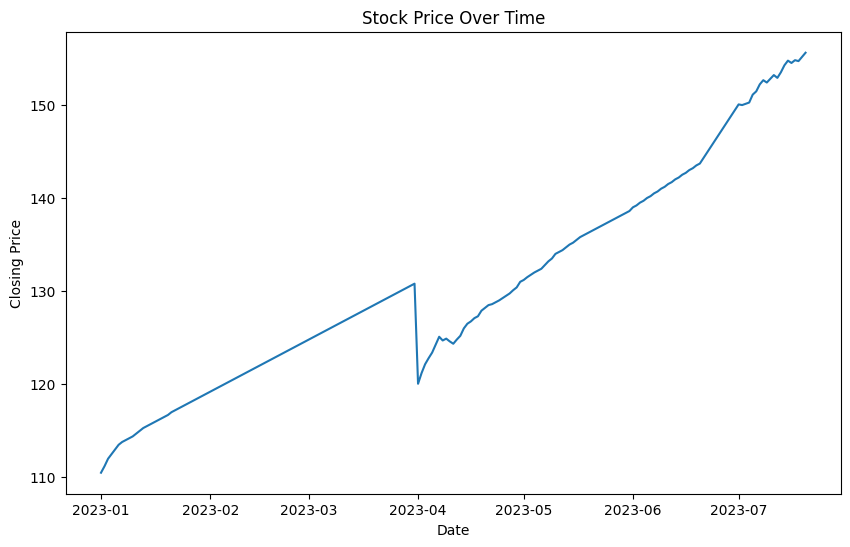

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [5]:
# Step 4: Train-Test Split
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
# Step 5: ARIMA Model Selection
# In this example, assume d=1, p=2, q=1
d = 1
p = 2
q = 1

In [13]:
# Step 6: Model Training
# model = ARIMA(train_data, order=(p, d, q))
# model_fit = model.fit()

# Step 6: Model Training
# model = ARIMA(train_data['Close'], order=(p, d, q))
# model_fit = model.fit()

# Step 6: Model Training
model = SARIMAX(train_data['Close'], order=(p, d, q))
model_fit = model.fit()

C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
# Step 7: Model Evaluation
predictions = model_fit.forecast(steps=len(test_data))
mae = mean_absolute_error(test_data['Close'], predictions)
rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 8.30
Root Mean Squared Error: 10.18


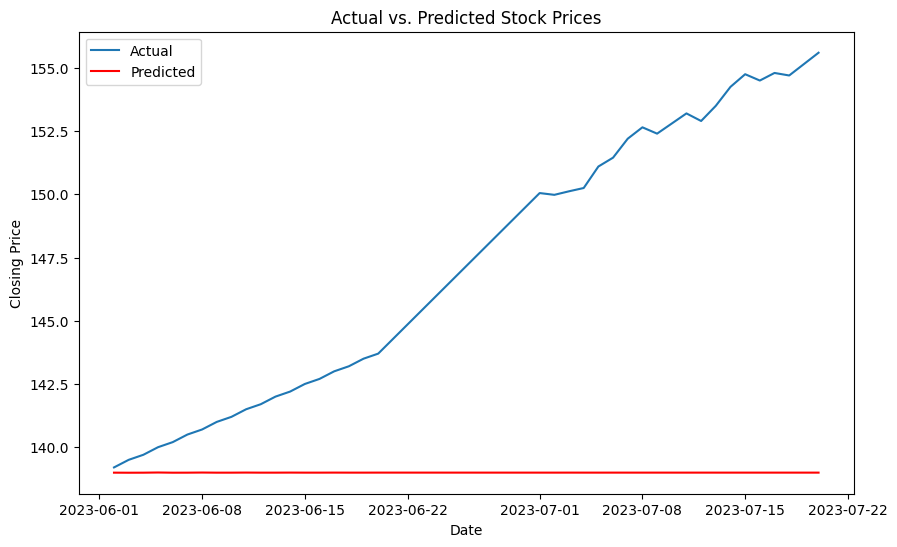

In [19]:
# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [21]:
# Step 9: Fine-tuning and Iteration
# Experiment with different values of d, p, and q to improve model performance

best_mae = float('inf')
best_order = None

for d in range(2):  # Iterate over possible values of d
    for p in range(5):  # Iterate over possible values of p
        for q in range(3):  # Iterate over possible values of q
            model = SARIMAX(train_data['Close'], order=(p, d, q))
            model_fit = model.fit()

            predictions = model_fit.forecast(steps=len(test_data))
            mae = mean_absolute_error(test_data['Close'], predictions)

            if mae < best_mae:
                best_mae = mae
                best_order = (p, d, q)

print(f'Best Order: {best_order} with MAE: {best_mae:.2f}')

# Train the best model with the best order
best_model = SARIMAX(train_data['Close'], order=best_order)
best_model_fit = best_model.fit()

C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppDa

C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationar

C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppDa

Best Order: (0, 1, 0) with MAE: 8.29


C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Atharva Pawar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


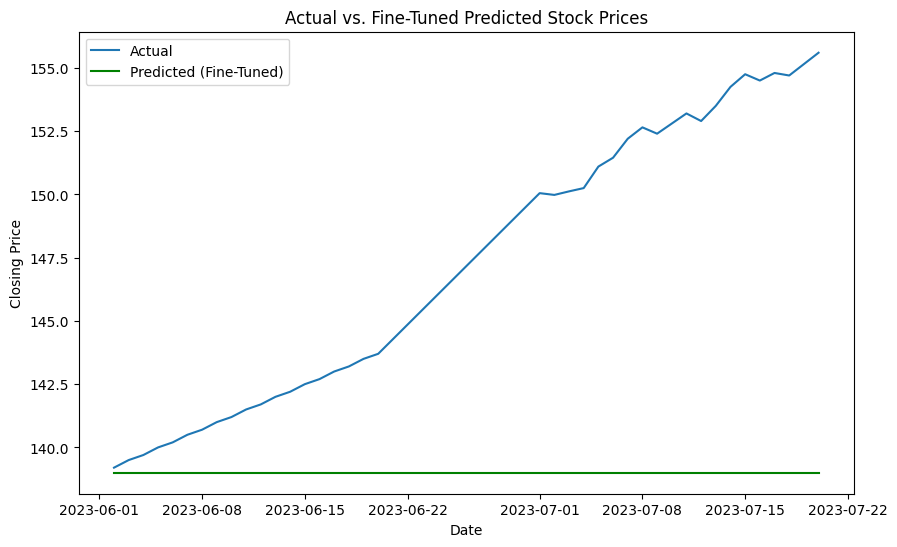

In [22]:
# Step 8: Visualization of Fine-Tuned Model
best_predictions = best_model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.plot(test_data.index, best_predictions, label='Predicted (Fine-Tuned)', color='green')
plt.title('Actual vs. Fine-Tuned Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [18]:
# Step 10: Future Predictions
# Use the trained model to make future predictions
future_steps = 10
future_predictions = model_fit.forecast(steps=future_steps)
print('Future Predictions:', future_predictions)

Future Predictions: 2023-06-02    138.992936
2023-06-03    138.990434
2023-06-04    138.992050
2023-06-05    138.999183
2023-06-06    138.991528
2023-06-07    138.992695
2023-06-08    138.997482
2023-06-09    138.992612
2023-06-10    138.993060
2023-06-11    138.996364
Freq: D, Name: predicted_mean, dtype: float64
